# Full recording overview (all cells)

In [ ]:
import os
import sys
import importlib as imp
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pickle
import parse_session_functions
import scipy.stats as stats
from scipy.ndimage import gaussian_filter1d
import matplotlib.patches as patches
import cellTV_functions as cellTV
imp.reload(cellTV)
#suppress the warnings
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [49]:
mouse = 'TAA0000066'
stage = '-t12'
base_path = '/Volumes/mrsic_flogel/public/projects/AtApSuKuSaRe_20250129_HFScohort2/'
imaging_path, config_path, frame_ix, date1, date2 = cellTV.get_session_folders(base_path, mouse, stage)

In [50]:
f, fneu, iscell, ops, seg, frame_rate = cellTV.load_img_data(imaging_path)
dF = cellTV.get_dff(f, fneu, frame_ix, ops)

Calculated dF/F with the following parameters: baseline=maximin, win_baseline=60.0, sig_baseline=10.0, fs=45,perctile_baseline=8.0


Training and Imaging
Performance =  0.7336947278911565
Number of laps =  109


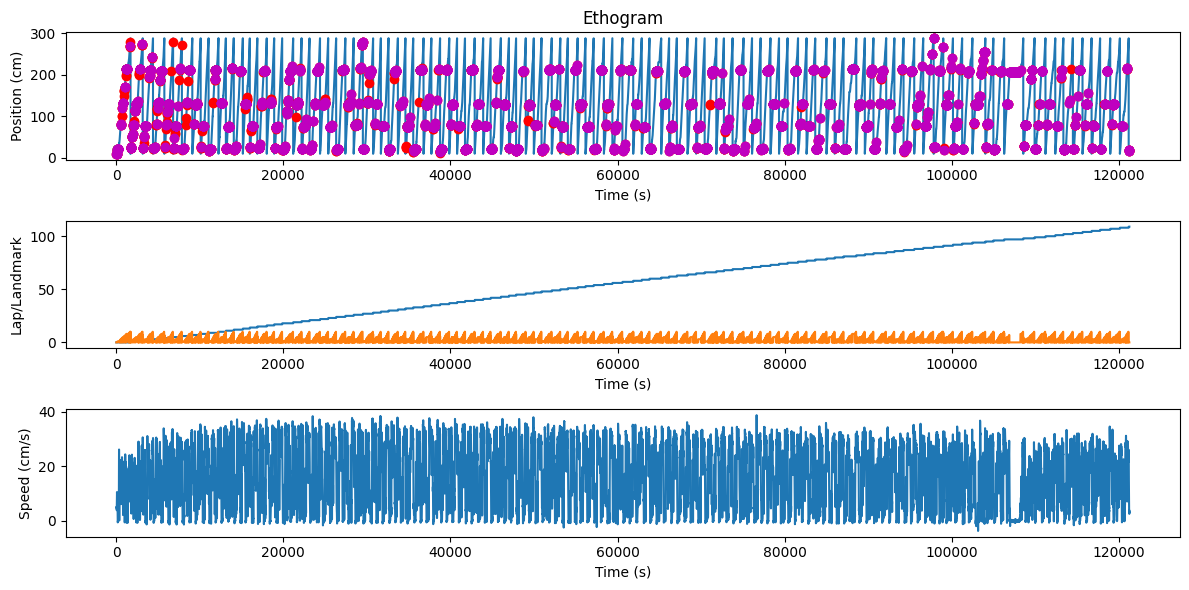

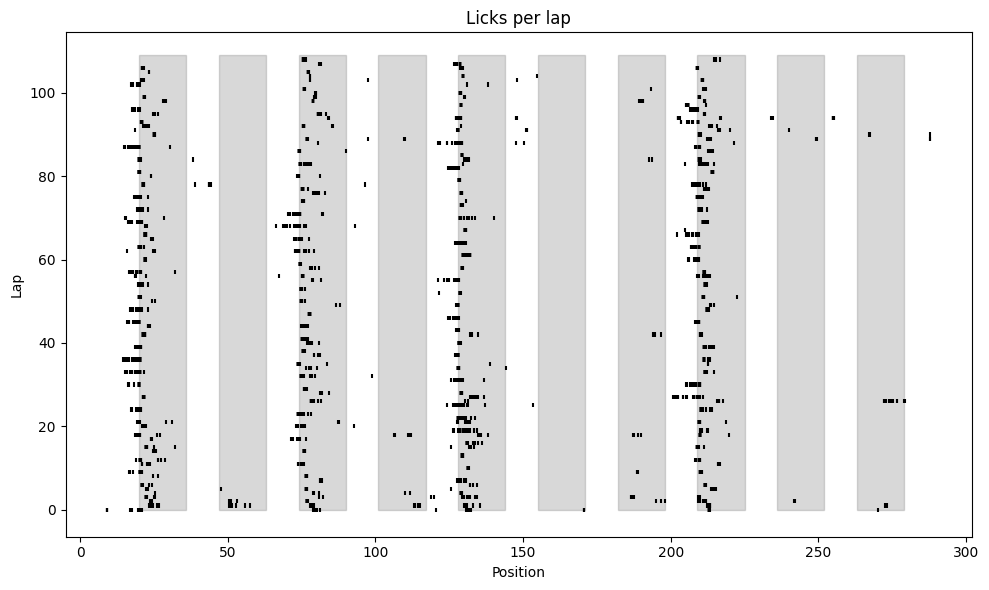

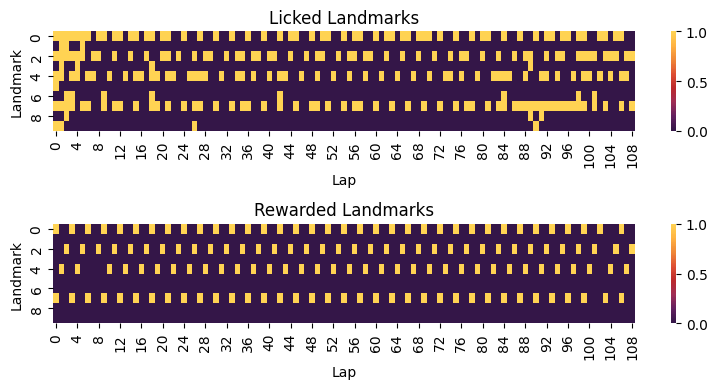

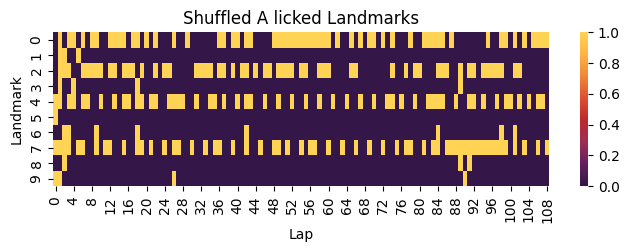

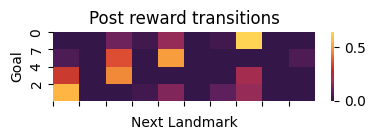

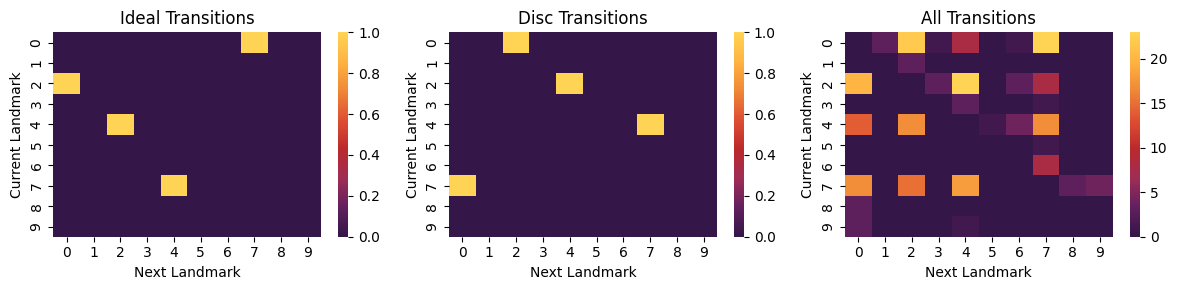

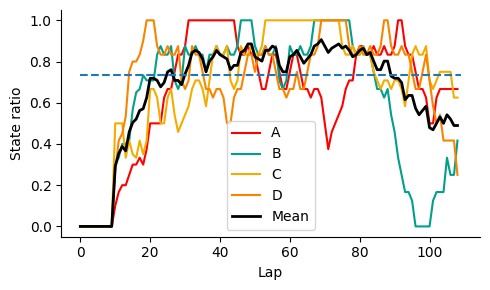

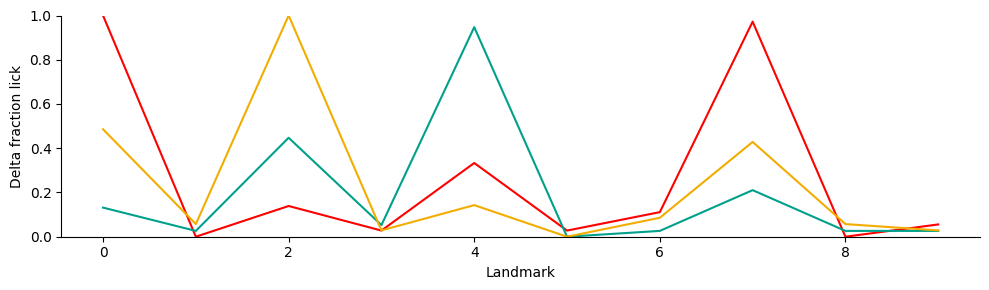

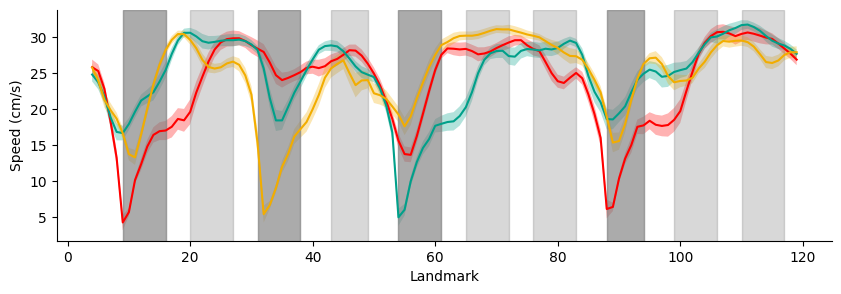

In [51]:
if stage in ['-t3','-t4','-t5', '-t6']:
    session = parse_session_functions.analyse_npz_pre7(mouse, date2, plot=False)
else:
    session = parse_session_functions.analyse_npz(mouse,date2,plot=True)

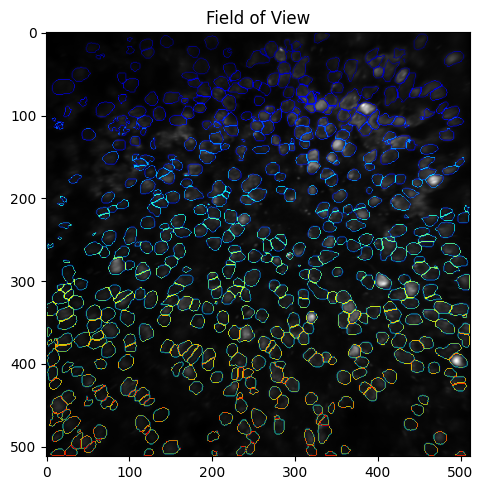

In [52]:
cellTV.show_fov(ops, seg)

Number of rewards: 144
Number of outliers: 0
Number of rewards after removing outliers: 144
Number of rewards: 144
Number of outliers: 0
Number of rewards after removing outliers: 144
Number of rewards: 144
Number of outliers: 0
Number of rewards after removing outliers: 144
Number of rewards: 144
Number of outliers: 0
Number of rewards after removing outliers: 144
Number of rewards: 144
Number of outliers: 0
Number of rewards after removing outliers: 144
Number of rewards: 144
Number of outliers: 0
Number of rewards after removing outliers: 144
Number of rewards: 144
Number of outliers: 0
Number of rewards after removing outliers: 144
Number of rewards: 144
Number of outliers: 0
Number of rewards after removing outliers: 144
Number of rewards: 144
Number of outliers: 0
Number of rewards after removing outliers: 144
Number of rewards: 144
Number of outliers: 0
Number of rewards after removing outliers: 144
Number of rewards: 144
Number of outliers: 0
Number of rewards after removing ou

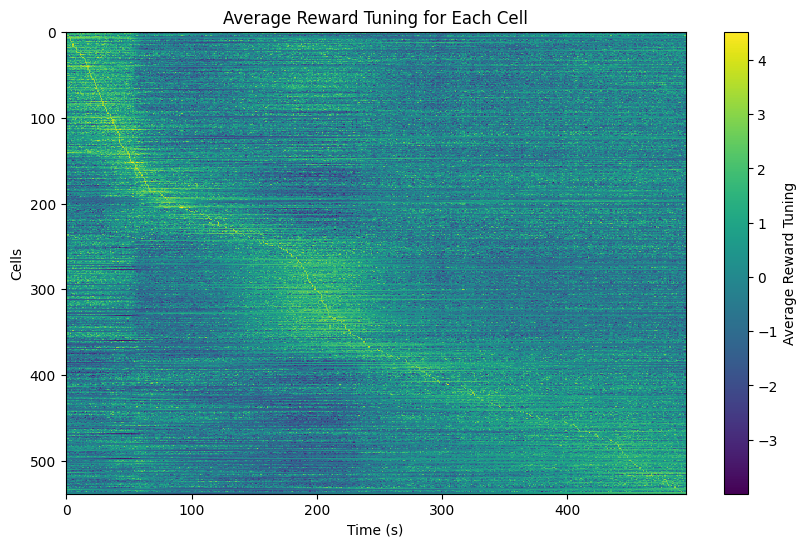

In [53]:
window_size = [-1,10]
frame_rate = 45  # Assuming a frame rate of 45 Hz
num_frames = (window_size[1] - window_size[0])*frame_rate
cell_rewards_avg = np.zeros((dF.shape[0], num_frames))  # Initialize an array to store average rewards for each cell
for c in range(dF.shape[0]):
    cell_rewards = cellTV.extract_reward_tuning(dF, c, session, frame_rate=frame_rate ,window_size = window_size, plot=False)
    cell_rewards_avg[c] = np.mean(cell_rewards, axis=0)

#zscore the average rewards
cell_rewards_avg = stats.zscore(cell_rewards_avg, axis=1)
#sort cells by the timing of their peak reward tuning
peak_times = np.argmax(cell_rewards_avg, axis=1)
sorted_indices = np.argsort(peak_times)
cell_rewards_avg = cell_rewards_avg[sorted_indices]
plt.figure(figsize=(10, 6))
plt.imshow(cell_rewards_avg, aspect='auto', cmap='viridis', interpolation='nearest')
plt.colorbar(label='Average Reward Tuning')
plt.xlabel('Time (s)')
plt.ylabel('Cells')
plt.title('Average Reward Tuning for Each Cell')
plt.show()

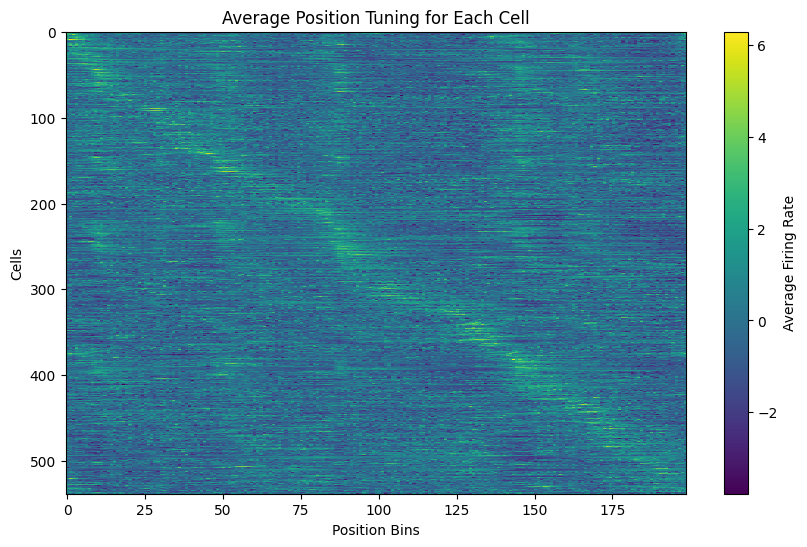

In [71]:
bins = 200  # Number of bins for position tuning
av_fr = np.zeros((dF.shape[0], bins))  # Initialize an array to store average firing rates for each cell
av_first_half = np.zeros((dF.shape[0], bins))
av_second_half = np.zeros((dF.shape[0], bins))
for c in range(dF.shape[0]):
    fr_per_bin, bin_edges = cellTV.extract_position_tuning(dF, c, stage, session, frame_rate=45, bins=bins, plot=False)
    av_fr[c] = np.nanmean(fr_per_bin, axis=0)
    half_trials = fr_per_bin.shape[0] // 2
    av_first_half[c] = np.nanmean(fr_per_bin[:half_trials, :], axis=0)
    av_second_half[c] = np.nanmean(fr_per_bin[half_trials:, :], axis=0)


#zscore the average firing rates
zsc_av_fr = stats.zscore(av_fr[:,1:], axis=1)
zsc_av_first_half = stats.zscore(av_first_half[:,1:], axis=1)
zsc_av_second_half = stats.zscore(av_second_half[:,1:], axis=1)
#sort cells by the timing of their peak position tuning
peak_times = np.argmax(zsc_av_first_half, axis=1)
sorted_cells = np.argsort(peak_times)
plotted_tuning = zsc_av_second_half[sorted_cells]
plt.figure(figsize=(10, 6))
plt.imshow(plotted_tuning, aspect='auto', cmap='viridis', interpolation='nearest')
plt.colorbar(label='Average Firing Rate')
plt.xlabel('Position Bins')
plt.ylabel('Cells')
plt.title('Average Position Tuning for Each Cell')
plt.show()

Real score for cell 0 is 0.87, phase preference is 45.00, state preference is 1.00, state tuning is 0.08
Real score for cell 1 is 0.84, phase preference is 44.00, state preference is 3.00, state tuning is 0.24
Real score for cell 2 is 0.65, phase preference is 14.00, state preference is 0.00, state tuning is 0.10
Real score for cell 3 is 0.74, phase preference is 0.00, state preference is 1.00, state tuning is 0.12
Real score for cell 4 is 0.76, phase preference is 14.00, state preference is 1.00, state tuning is 0.28
Real score for cell 5 is 0.96, phase preference is 22.00, state preference is 1.00, state tuning is 0.42
Real score for cell 6 is 0.81, phase preference is 4.00, state preference is 0.00, state tuning is 0.18
Real score for cell 7 is 1.48, phase preference is 84.00, state preference is 2.00, state tuning is 0.60
Real score for cell 8 is 0.98, phase preference is 0.00, state preference is 2.00, state tuning is 0.21
Real score for cell 9 is 0.94, phase preference is 87.00, 

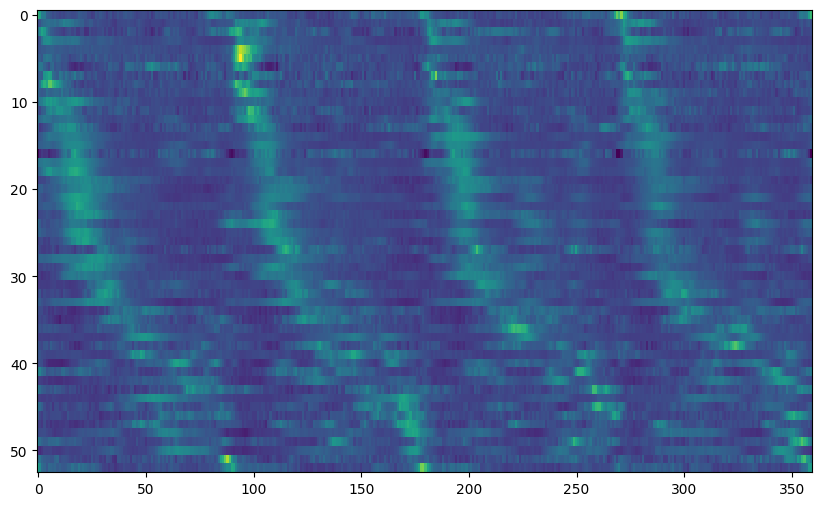

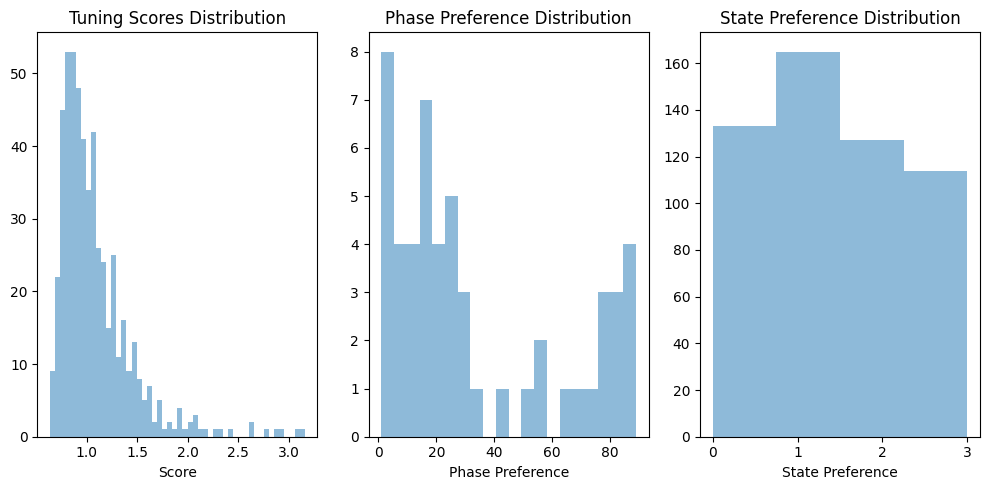

In [88]:
av_binned_all = np.zeros((dF.shape[0], 90*4))  # Initialize an array to store average binned data for each cell
score = np.zeros(dF.shape[0])
phase_pref = np.zeros(dF.shape[0])
state_pref = np.zeros(dF.shape[0])
state_tuning = np.zeros(dF.shape[0])
for c in range(dF.shape[0]):
    av_binned_all[c,:],score[c],_,phase_pref[c],state_pref[c],state_tuning[c] = cellTV.calc_goal_tuningix(dF, c, session, condition='goal', event_frames=None, n_goals=4, frame_rate=45, bins=90, shuffle=False, plot=False)

zscore_av_binned_all = stats.zscore(av_binned_all, axis=1)

#select only cells with a score >1.5
high_score_cells = np.where(score > 1.5)[0]
zscore_av_binned_all = zscore_av_binned_all[high_score_cells]
phase_pref = phase_pref[high_score_cells]

#sort cells by the preferred phase
sorted_indices = np.argsort(phase_pref)

plt.figure(figsize=(10, 6))
plt.imshow(zscore_av_binned_all[sorted_indices], aspect='auto', cmap='viridis', interpolation='none')


plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.hist(score, bins=50, alpha=0.5, label='Tuning Scores')
plt.title('Tuning Scores Distribution')
plt.xlabel('Score')
plt.subplot(1, 3, 2)
plt.hist(phase_pref, bins=20, alpha=0.5, label='Phase Preference')
plt.title('Phase Preference Distribution')
plt.xlabel('Phase Preference')
plt.subplot(1, 3, 3)
plt.hist(state_pref,bins=4, alpha=0.5, label='State Preference')
plt.title('State Preference Distribution')
plt.xlabel('State Preference')
plt.tight_layout()
plt.show()


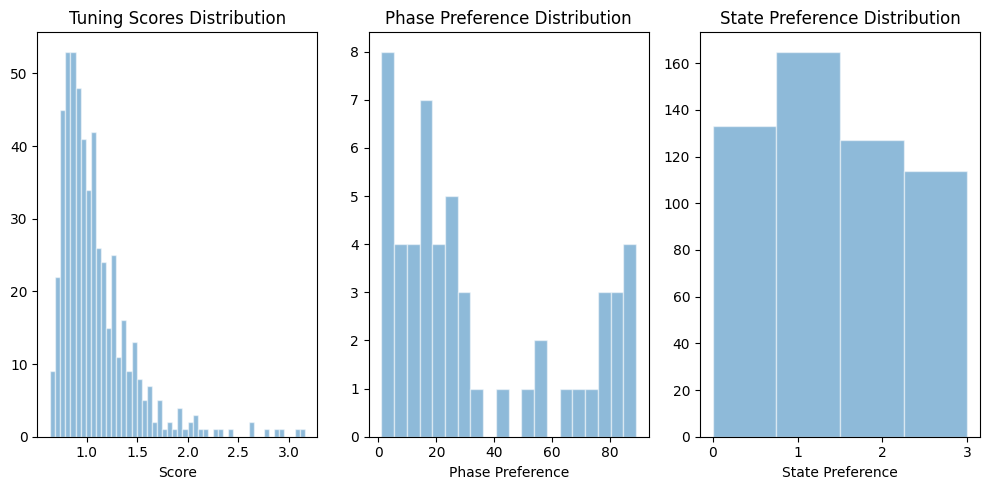

In [74]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
#give bars an outline
plt.hist(score, bins=50, alpha=0.5, label='Tuning Scores', edgecolor='white')
plt.title('Tuning Scores Distribution')
plt.xlabel('Score')
plt.subplot(1, 3, 2)
plt.hist(phase_pref, bins=20, alpha=0.5, label='Phase Preference', edgecolor='white')
plt.title('Phase Preference Distribution')
plt.xlabel('Phase Preference')
plt.subplot(1, 3, 3)
plt.hist(state_pref,bins=4, alpha=0.5, label='State Preference', edgecolor='white')
plt.title('State Preference Distribution')
plt.xlabel('State Preference')
plt.tight_layout()
plt.show()

In [56]:
#highest scoring 20 cells
high_scores = score[high_score_cells]
top_cells = np.argsort(high_scores)[-20:]
print(f"Top 20 cells based on tuning score: {high_score_cells[top_cells[:20]]}")
print(f"Phase Preferences: {phase_pref[top_cells[:20]]}")

Top 20 cells based on tuning score: [463  84 379 404  33 475 501 523 469 512 185 516 249  12 180 481 215 448
 400 339]
Phase Preferences: [41. 74. 85. 30. 80. 10.  4.  6. 13.  1. 89. 22. 57.  4. 27. 14. 50. 17.
 17. 18.]


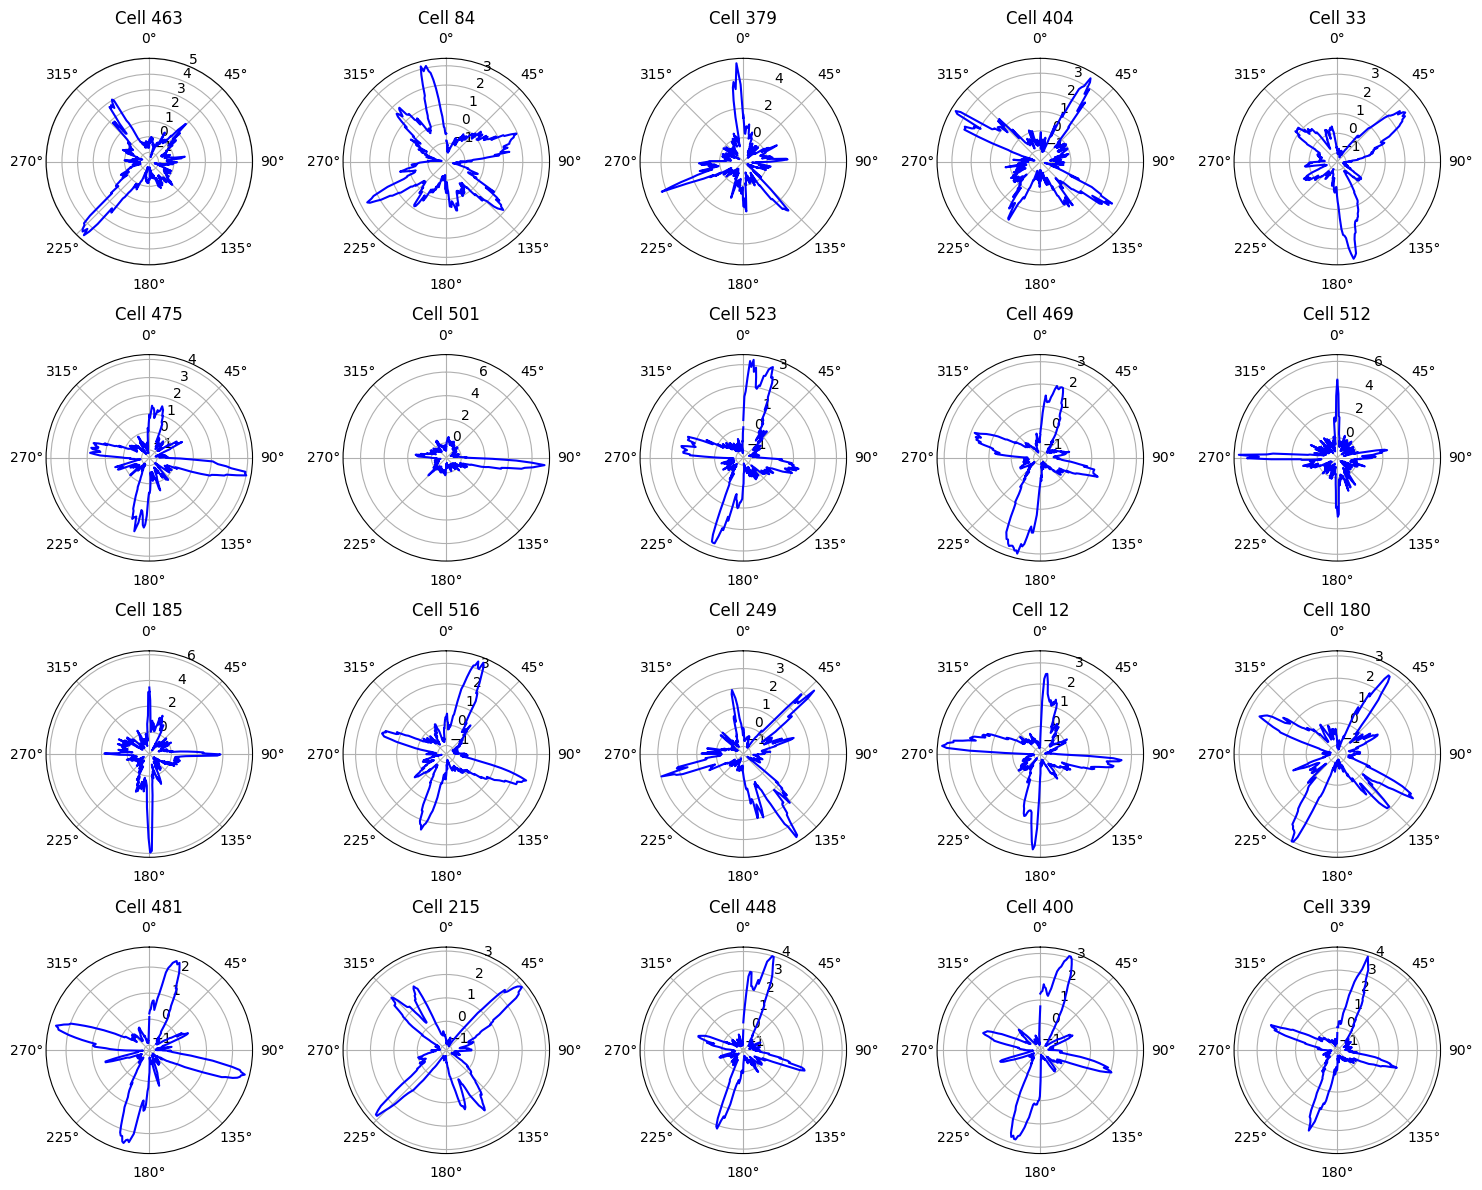

In [76]:
#plot the polar plots for the top cells
plt.figure(figsize=(15, 12))
for i, cell in enumerate(top_cells[:20]):
    plt.subplot(4, 5, i + 1, polar=True)
    plt.title(f"Cell {high_score_cells[cell]}")
    plt.polar(np.linspace(0, 2 * np.pi, 360), zscore_av_binned_all[cell], color='b')
    # plt.fill(np.linspace(0, 2 * np.pi, 360), zscore_av_binned_all[cell], color='b', alpha=0.1)
    plt.gca().set_theta_zero_location('N')
    plt.gca().set_theta_direction(-1)
plt.tight_layout()
plt.show()

Top 20 cells based on tuning score: [110 302 270 443 221 154  81 509 448 286 307 374 310 440 122  98  33 463
 392 501]


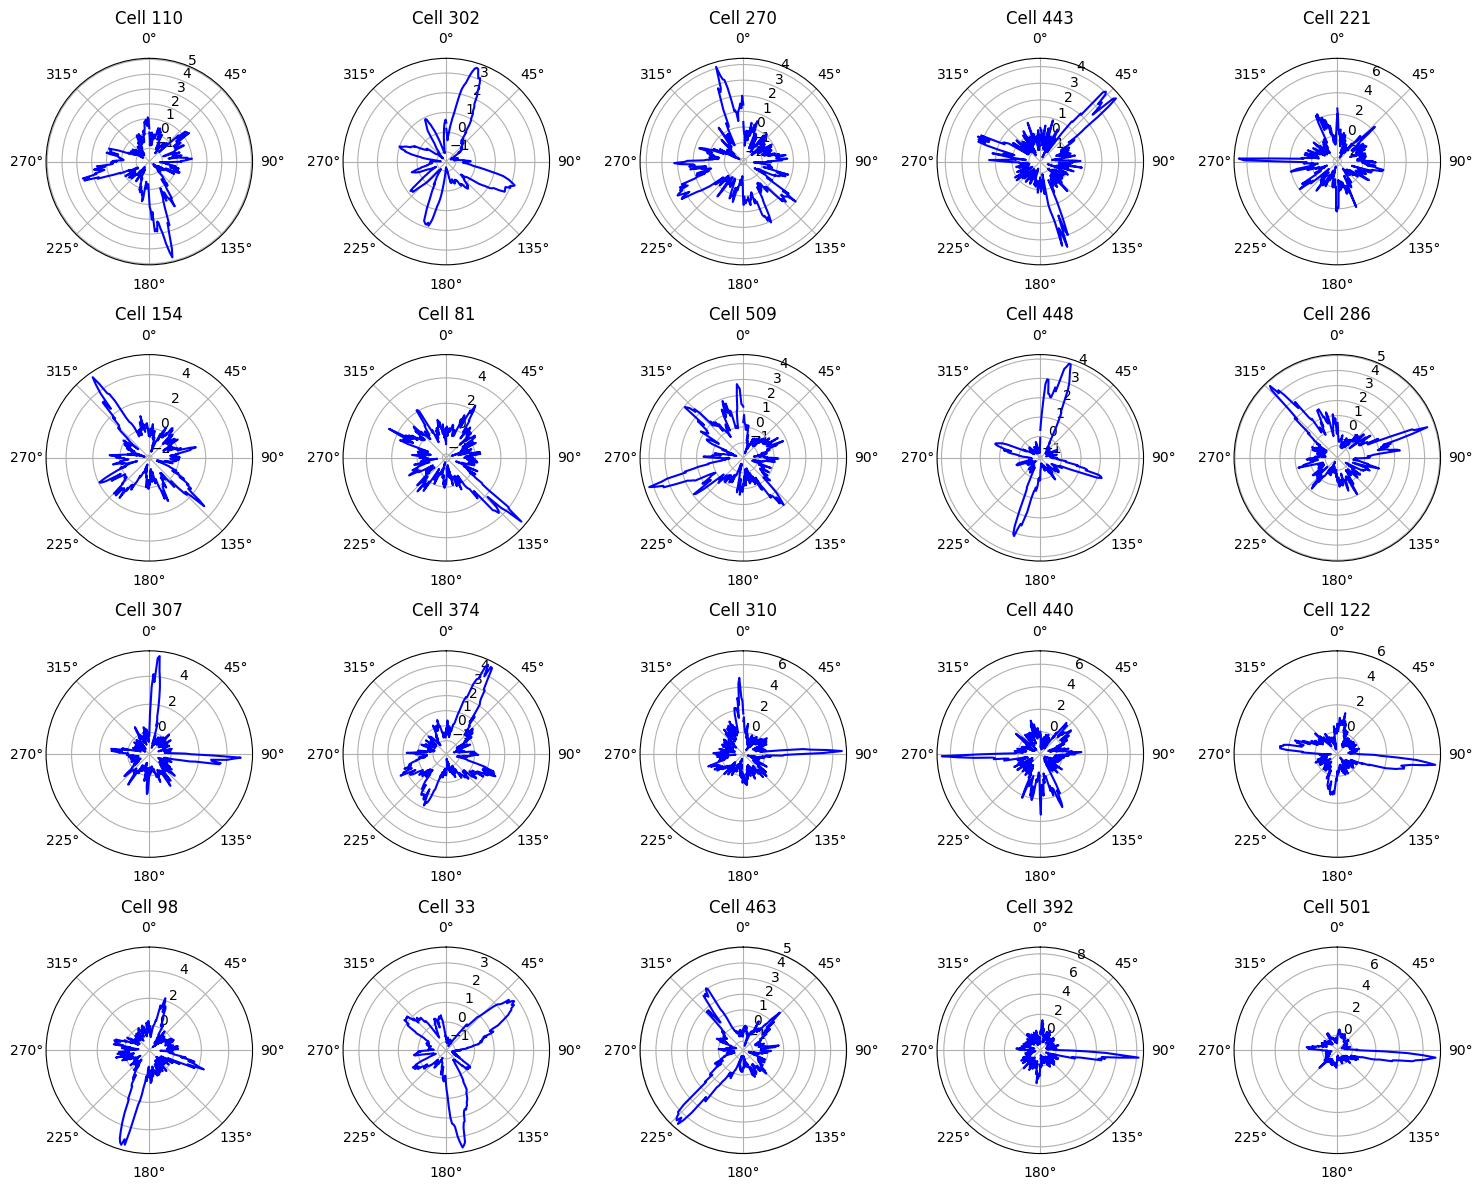

In [89]:
#highest scoring 20 cells
zscore_av_binned_all = stats.zscore(av_binned_all, axis=1)
high_state_tuning_cells = np.where(state_tuning > 0.5)[0]
high_states = state_tuning[high_state_tuning_cells]
top_cells = np.argsort(high_states)[-20:]
print(f"Top 20 cells based on tuning score: {high_state_tuning_cells[top_cells[:20]]}")
zscore_av_binned_all = zscore_av_binned_all[high_state_tuning_cells]

plt.figure(figsize=(15, 12))
for i, cell in enumerate(top_cells):
    plt.subplot(4, 5, i + 1, polar=True)
    plt.title(f"Cell {high_state_tuning_cells[cell]}")
    plt.polar(np.linspace(0, 2 * np.pi, 360), zscore_av_binned_all[cell], color='b')
    # plt.fill(np.linspace(0, 2 * np.pi, 360), zscore_av_binned_all[cell], color='b', alpha=0.1)
    plt.gca().set_theta_zero_location('N')
    plt.gca().set_theta_direction(-1)
plt.tight_layout()
plt.show()


Text(0.5, 0, 'Score')

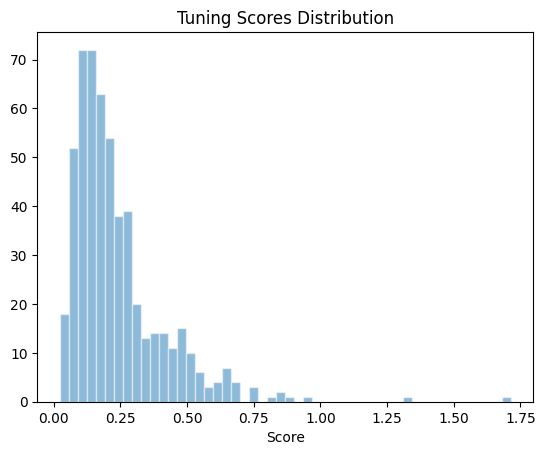

In [90]:
plt.hist(state_tuning, bins=50, alpha=0.5, label='Tuning Scores', edgecolor='white')
plt.title('Tuning Scores Distribution')
plt.xlabel('Score')

### All to all correlation in that session (clustered)

In [58]:
correlation_all, correlation_sorted = cellTV.cluster_all_corr(dF,plot=True)

KeyboardInterrupt: 